In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import joblib
import csv
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import skimage.feature as ft
from sklearn import metrics
from commonFunctions import *

In [8]:
def shadow_removalDialate(img):
    # img2 = cv2.imread(f'../Dataset_0-5/men/{num}/4_men (49).JPG')
    img2 = cv2.resize(img, (256, 256))
    
    img_hls = cv2.cvtColor(img2, cv2.COLOR_BGR2HLS)

    # define lower and upper bounds for blue color in HLS format
    lower_blue = np.array([0, 0, 60])
    upper_blue = np.array([20, 255, 255])
    # create a mask for blue color in HLS format
    mask = cv2.inRange(img_hls, lower_blue, upper_blue)
    # daialation
    kernel = np.ones((3,3),np.uint8)
    mask = cv2.dilate(mask,kernel,iterations = 8)
    # apply the mask to the original image
    result = cv2.bitwise_and(img2, img2, mask=mask)
    # show_images([result])
    return result

In [9]:
def preprocessing(img,img2):
    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply histogram equalization to enhance contrast and remove lighting effects
    equalized = cv2.equalizeHist(gray)
    # io.imshow(equalized)
    # # Find the contours of the binary image
    contours, hierarchy = cv2.findContours(equalized, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    max_contour = max(contours, key=cv2.contourArea)

    # # Draw the largest contour on the original image
    cv2.drawContours(img2, [max_contour], 0, (0, 255, 0), 2)
    # io.imshow(img2)
    # # Show the image with the largest contour drawn
    # # Create a bounding box around the hand
    x, y, w, h = cv2.boundingRect(max_contour)

    # # Crop the image to the bounding box around the hand
    hand = equalized[y:y+h, x:x+w]
    # added 
    Noise_Reduction = cv2.medianBlur(hand, 5)
    img3 = cv2.resize(Noise_Reduction, (256, 256))
    # io.imshow(img3)

    return img3

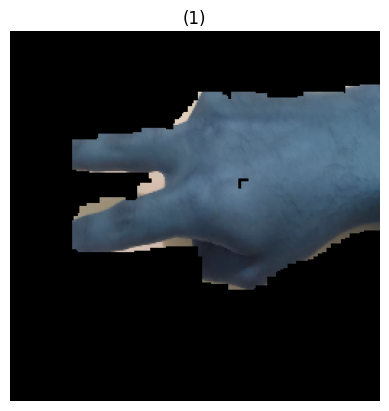

['2']


c:\Users\khale\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:288: UserWarning: Trying to unpickle estimator SVC from version 1.2.2 when using version 1.2.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [14]:
im= cv2.imread("./test/hand4.jpeg")
img = cv2.resize(im, (256,256))

result_image=shadow_removalDialate(img)
preprocessed_image=preprocessing(result_image,img)

# hog = Hog_descriptor(preprocessed_image, cell_size=4, bin_size=9)
# Compute HOG features
# fd = hog(preprocessed_image, orientations=orientations, pixels_per_cell=pixels_per_cell,cells_per_block=cells_per_block, visualize=visualize, channel_axis=-1)
fd = ft.hog(preprocessed_image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1),visualize=False)
model = joblib.load('./model/models88')
print(model.predict([fd]))